In [1]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

In [2]:
conn2 = ps.connect(dbname = "study sql", 
                   user = "postgres", 
                   password = "Passswors", host = "localhost", port = "5432")

In [3]:
sql = """SELECT *
	FROM public.retail_sales_data;"""

In [4]:
df = sqlio.read_sql_query(sql, conn2)

C:\Users\vishal\AppData\Local\Temp\ipykernel_19856\2636434275.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql, conn2)


In [5]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50.0,150.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500.0,1000.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30.0,30.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500.0,500.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50.0,100.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1000 non-null   int64  
 1   Date              1000 non-null   object 
 2   Customer ID       1000 non-null   object 
 3   Gender            1000 non-null   object 
 4   Age               1000 non-null   int64  
 5   Product Category  1000 non-null   object 
 6   Quantity          1000 non-null   int64  
 7   Price per Unit    1000 non-null   float64
 8   Total Amount      1000 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [7]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [8]:
#Conver month columns to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create the 'month' column
df['month'] = df['Date'].dt.to_period('M')

# Convert 'month' to datetime
df['month'] = df['month'].dt.to_timestamp()

In [9]:
df[['Date', 'month']].head(2)

,Date,month
0,2023-11-24,2023-11-01
1,2023-02-27,2023-02-01


In [10]:
#Check the data

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50.0,150.0,2023-11-01
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500.0,1000.0,2023-02-01
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30.0,30.0,2023-01-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500.0,500.0,2023-05-01
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50.0,100.0,2023-05-01


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

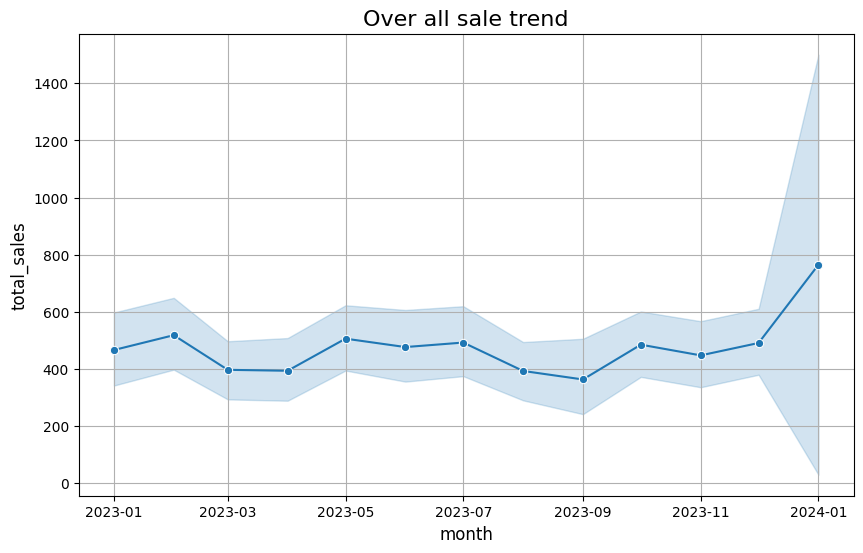

In [12]:
#  Plot overall sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(data = df, x = 'month', y = 'Total Amount', marker = 'o')
plt.title("Over all sale trend", fontsize = 16)
plt.xlabel("month", fontsize = 12)
plt.ylabel("total_sales", fontsize = 12)
plt.grid(True)
plt.show()

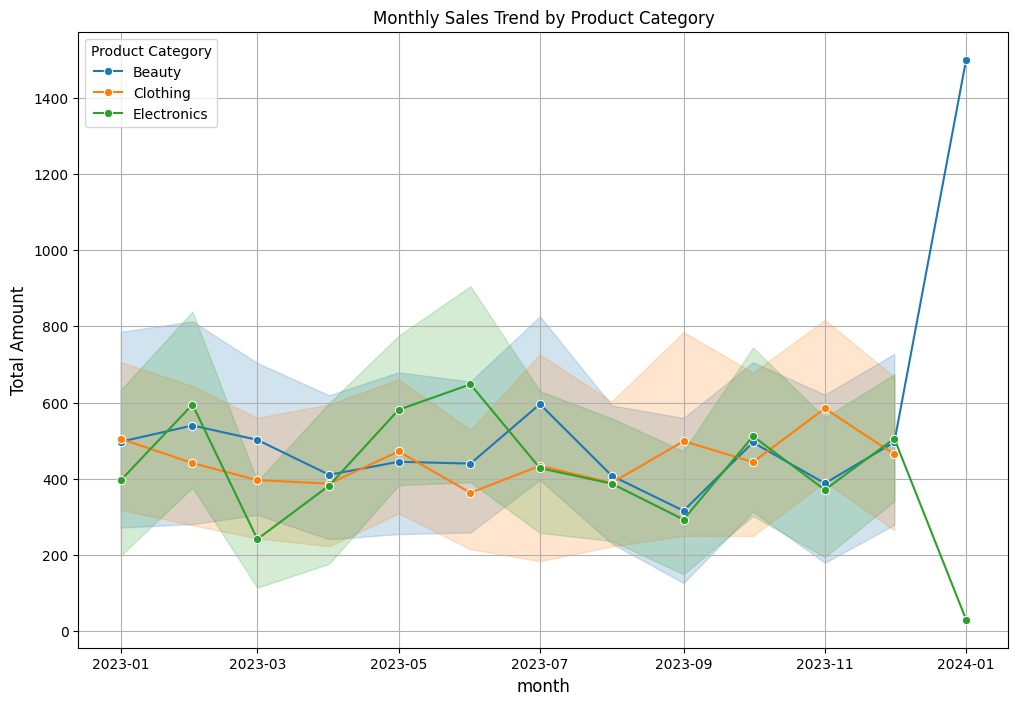

In [13]:
# Plot sales trend by category

plt.figure(figsize=(12, 8))
sns.lineplot(data = df, x = 'month', y = 'Total Amount', hue = 'Product Category', marker = 'o')
plt.title('Monthly Sales Trend by Product Category')
plt.xlabel('month', fontsize = 12)
plt.ylabel('Total Amount', fontsize = 12)
plt.legend(title = 'Product Category')
plt.grid(True)
plt.show()

 # Insights

## After visualizing the data

## Beauty product categories perform well in 11 November 2023 to 1 January 2024 duration

## After November the sales of all products increase overall in all category Expect Electronics